In [1]:
import PIL
import numpy
from PIL import Image
import matplotlib.pyplot
%matplotlib inline
import time
import cv2

In [7]:
def filename_crop_array(filename, coords, show=False):
    img = Image.open(filename)
    img = img.crop(coords)
    if show:
        img.show()
    return img.load()

In [6]:
def array_to_img(arr, size):
    img = Image.new("RGB", size)
    for x in range(size[0]):
        for y in range(size[1]):
            img.putpixel((x, y), arr[x, y])
    return(img)

In [5]:
def clean_analyse_img(filename):
    img = Image.open(filename)
    cnt=0
    print(filename, ":\tMain color is:", pxstats_str(img))
    return 

In [4]:
def pxstats(img):#[anz_rot, anz_gruen, anz_blue]
    stat = [0, 0, 0]
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            rgb = img.getpixel((x, y))
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            if (r-20>= g) and (r-20>= b) and sum(rgb)>200:
                stat[0] +=1
            elif (g-20>= r) and (g-20>= b):
                stat[1] +=1
            elif (b-20>= r) and (b-20>= g):
                stat[2] +=1
    return stat

def pxstats2(img):#[anz_rot, anz_gruen, anz_blue]
    stat = [0, 0, 0]
    bt = 30
    for x in range(0, 800, 4):
        for y in range(0, 600, 4):
            #print(img.size)
            #print((400-x, 300-y))
            rgb = img.getpixel((x, y))
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            if (r-bt>= g) and (r-bt>= b):# and sum(rgb)>200:
                stat[0] +=1
            elif (g-bt>= r) and (g-bt>= b):
                stat[1] +=1
            elif (b-bt>= r) and (b-bt>= g):
                stat[2] +=1
            #check if the color is already clear:
            tr = 400
            if stat[0]-tr>stat[1] and stat[0]-tr>stat[2]:
                return [1, 0, 0]
            elif stat[1]-tr>stat[0] and stat[1]-tr>stat[2]:
                return [0, 1, 0]
            elif stat[2]-tr>stat[0] and stat[2]-tr>stat[1]:
                return [0, 0, 1]
    return stat

def pxstats_str(img):
    stat = pxstats2(img)
    #print(stat)
    r = stat[0]
    g = stat[1]
    b = stat[2]
    if r>g and r>b:
        return "Red"
    elif g>r and g>b:
        return "Green"
    else:
        return "Blue"

def pxshowrgb(img):
    img = img.copy()
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            rgb = img.getpixel((x, y))
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            if (r-20>= g) and (r-20>= b) and sum(rgb)>200:
                img.putpixel((x, y), (255, 0, 0))
            elif (g-20>= r) and (g-20>= b):
                img.putpixel((x, y), (0, 255, 0))
            elif (b-20>= r) and (b-20>= g):
                img.putpixel((x, y), (0, 0, 255))
    return img

In [8]:
while True:
    start = time.perf_counter()
    for i in range(10, 45):
        fn = "DSC"+str(i)+".JPG"
        clean_analyse_img(fn)
    stop = time.perf_counter()
    print((stop-start)/35)

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.40028175040003716
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.4187326904571299
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3602755560285524
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.35328615631426924
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3581148812571753
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.34934301102860316
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3535967735713971
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.35943604591427303
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3635235843713807
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.35433346739997174
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.359772381257114
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main col

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3497581426000189
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.337377576200015
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Mai

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.330078010714247
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main c

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33476004308571905
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3342854308000304
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3293442719143059
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3277864854857138
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3372817709999903
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33581903437142113
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3346361698857176
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3387848508857652
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3368689327714362
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3336632968285682
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33072897505714666
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33264155742861995
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.32965162568569734
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3327016864857017
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3312583736571209
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33262456060001566
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33146601128568626
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3378750620856798
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3380344684571485
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33030689871432384
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33121781974285636
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3356876466000228
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33656131548575235
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33937972554288404
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3314141943714536
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33252955260000555
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33641455634284023
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3359317269999987
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3343466472000208
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33457542234287496
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3359457964857159
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3336596313428475
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33136674820000606
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3356534527142815
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33152825528574925
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33240285551432214
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33555263697146853
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3327159147143123
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33002961977139683
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33855202302854326
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33850352394287514
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33467308445719285
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3305868746286121
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33385243911429174
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33092134877146495
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33841353422857146
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3361825684285577
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.34183816677141293
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3306882598285613
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3353169979714169
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33429795777145566
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3360084337142845
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33283239948572635
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.32923383825712205
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3316135530000403
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33776375362857447
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.335126951942844
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main col

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33043167448569355
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3358128943714421
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.338652742771436
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main c

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33803319414291766
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33357389734290854
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3358906918571198
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.337474622085782
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main c

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.32973371214289465
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3313242192571384
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33779780685716626
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3285474736000262
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33481895048576654
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.336202416971355
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33247233520004166
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3411453471999266
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33876439688569265
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33763881488568065
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33687462717145017
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33497282471424633
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.334405160971385
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main col

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33088958262856716
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33584024314280086
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3370165160286498
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3327172419143608
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33400531954290014
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33871608988577334
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3373793846857942
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3343677978285996
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33972780971421995
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33629343779996684
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3331827425713917
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3378882069714434
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33767658542856227
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33895951682851383
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3363580413714642
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.330036345285667
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main col

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3418966545714024
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3361962468000586
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3328707662856946
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.32970030317145366
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3381678827142293
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33573545208575006
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3382247548285315
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main 

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3317671006857251
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main co

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.34024469357152287
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color 

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3366992748858008
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Ma

DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.33185940731429064
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main

DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.32999502042855183
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main c

DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.3322753821143124
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color i

DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	Main color is: Red
DSC13.JPG :	Main color is: Red
DSC14.JPG :	Main color is: Red
DSC15.JPG :	Main color is: Red
DSC16.JPG :	Main color is: Red
DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG 

DSC17.JPG :	Main color is: Red
DSC18.JPG :	Main color is: Red
DSC19.JPG :	Main color is: Red
DSC20.JPG :	Main color is: Red
DSC21.JPG :	Main color is: Blue
DSC22.JPG :	Main color is: Blue
DSC23.JPG :	Main color is: Blue
DSC24.JPG :	Main color is: Blue
DSC25.JPG :	Main color is: Blue
DSC26.JPG :	Main color is: Blue
DSC27.JPG :	Main color is: Blue
DSC28.JPG :	Main color is: Blue
DSC29.JPG :	Main color is: Blue
DSC30.JPG :	Main color is: Blue
DSC31.JPG :	Main color is: Blue
DSC32.JPG :	Main color is: Green
DSC33.JPG :	Main color is: Green
DSC34.JPG :	Main color is: Green
DSC35.JPG :	Main color is: Green
DSC36.JPG :	Main color is: Green
DSC37.JPG :	Main color is: Green
DSC38.JPG :	Main color is: Green
DSC39.JPG :	Main color is: Green
DSC40.JPG :	Main color is: Green
DSC41.JPG :	Main color is: Green
DSC42.JPG :	Main color is: Green
DSC43.JPG :	Main color is: Green
DSC44.JPG :	Main color is: Green
0.38909463794282473
DSC10.JPG :	Main color is: Red
DSC11.JPG :	Main color is: Red
DSC12.JPG :	M

KeyboardInterrupt: 

In [2]:
def img_cap_show():
    start = time.perf_counter()
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    print(frame)
    frame = numpy.array(frame)
    print(frame.ndim)
    b, g, r = frame[:,:,0], frame[:,:,1], frame[:,:,2]
    frame = numpy.dstack((r, b, g))
    matplotlib.pyplot.imshow(frame)
    stop = time.perf_counter()
    print((stop-start))

True
0.970655416999989


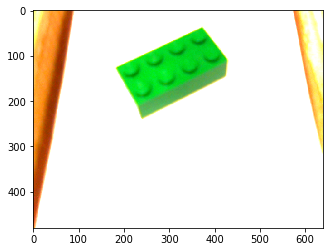

In [7]:
#%reload_ext line_profiler
capture_img()

In [41]:

start = time.perf_counter()
tr = 400
bt=20
pxjump = 30
use_webcam = False
start = time.perf_counter()
if not use_webcam:#use test images
    ret=True
    for i in range(10, 45):
        fn = "DSC"+str(i)+".JPG"
        print(fn, analyse_frame(Image.open(fn).load(), pxjump, tr, bt, 800, 600))
else:
    ret = False
while not ret:
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    print(ret)
#stat = [0, 0, 0]
#bt = 30
#matplotlib.pyplot.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

stop = time.perf_counter()
print((stop-start if use_webcam else (stop-start)/35))

DSC10.JPG Red
DSC11.JPG Red
DSC12.JPG Red
DSC13.JPG Red
DSC14.JPG Red
DSC15.JPG Red
DSC16.JPG Red
DSC17.JPG Red
DSC18.JPG Red
DSC19.JPG Red
DSC20.JPG Red
DSC21.JPG Blue
DSC22.JPG Blue
DSC23.JPG Blue
DSC24.JPG Blue
DSC25.JPG Blue
DSC26.JPG Blue
DSC27.JPG Blue
DSC28.JPG Blue
DSC29.JPG Blue
DSC30.JPG Blue
DSC31.JPG Blue
DSC32.JPG Green
DSC33.JPG Green
DSC34.JPG Green
DSC35.JPG Green
DSC36.JPG Green
DSC37.JPG Green
DSC38.JPG Green
DSC39.JPG Green
DSC40.JPG Green
DSC41.JPG Green
DSC42.JPG Green
DSC43.JPG Green
DSC44.JPG Green
0.08011424705713839


In [6]:
def analyse_frame(frame, pxjump=4, tr=400, bt=20, ylen=640, xlen=480, x1crop=0, x2crop=0, y1crop=0, y2crop=0):
    stat= [0, 0, 0]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame=frame[:, x1crop:-x2crop]
    matplotlib.pyplot.imshow(frame)
    for y in range(y1crop, ylen-y2crop, pxjump):
        for x in range(x1crop, xlen-x2crop, pxjump):
            rgb = frame[x, y]
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            if (r-bt>= g) and (r-bt>= b):# and sum(rgb)>200:
                stat[0] +=1
                #print(x, y, "stat0", frame[x, y])
            elif (g-bt>= r) and (g-bt>= b):
                stat[1] +=1
                #print(x, y, "stat1", frame[x, y])
            elif (b-bt>= r) and (b-bt>= g):
                stat[2] +=1
                #print(x, y, "stat2", frame[x, y])
            if stat[0]-tr>stat[1] and stat[0]-tr>stat[2]:
                #print(stat)
                return "Red"
            elif stat[1]-tr>stat[0] and stat[1]-tr>stat[2]:
                #print(stat)
                return "Green"
            elif stat[2]-tr>stat[0] and stat[2]-tr>stat[1]:
                #print(stat)
                return "Blue"
    print(stat)
    r = stat[0]
    g = stat[1]
    b = stat[2]
    if r>g and r>b:
        return "Red"
    elif g>r and g>b:
        return "Green"
    else:
        return "Blue"
    

In [ ]:
ret = False
while 1:
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    if ret:
        matplotlib.pyplot.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
def capture_img():
    
    ret = False
    while not ret:
        cap = cv2.VideoCapture(0)
        ret, frame = cap.read()
        print(ret)
    #matplotlib.pyplot.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    return frame

True
Blue
Frame captured&analysed in: 0.7011817680000263 0.4039054510000142 1.1050872190000405


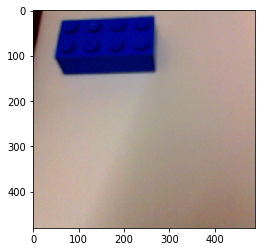

In [14]:
tr = 20
bt=30
pxjump = 12
start = time.perf_counter()
i = capture_img()
stop1 = time.perf_counter()
print(analyse_frame(i, pxjump=pxjump, tr=tr, bt=bt, x1crop=75, x2crop=75))
stop2 = time.perf_counter()
print("Frame captured&analysed in:", (stop1-start), (stop2-stop1), (stop2-start))